In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from lcmcmc.utils import get_data_dir_path

In [3]:
analysis = "pcs" # either pcs or bazin

In [4]:
#Load the data for the header file and photometric file.
path_perfect_sims_phot = "/sps/lsst/users/bbiswas/data/kilonova_datasets/RESSPECT/RESSPECT_PERFECT_LIGHTCURVE_WITH_KN.csv"
path_perfect_sims_head = "/sps/lsst/users/bbiswas/data/kilonova_datasets/RESSPECT/RESSPECT_PERFECT_HEAD_WITH_KN.csv"

df_head = pd.read_csv(path_perfect_sims_head)
df_phot = pd.read_csv(path_perfect_sims_phot)

In [5]:
#extract the objects as in the KN paper 

selected_ids = np.load(os.path.join(get_data_dir_path(), "selected_ids.npy"))

df_head = df_head[df_head["SNID"].isin(list(selected_ids))]
df_phot = df_phot[df_phot["SNID"].isin(list(selected_ids))]

In [6]:
# Use only g and r band

mask = (df_phot['FLT'] == 'g') | (df_phot['FLT'] == 'r')
df_phot = df_phot[mask]

# Preprocessing

In [7]:
from lcmcmc.preprocessing import add_object_band_index, preprocess_SNANA, extract_subsample

In [8]:
df_head, df_phot=extract_subsample(df_head=df_head, df_phot=df_phot, event_type="random", num_sample=50)

In [9]:
df_phot

,SNID,MJD,FLT,FLUXCAL,FLUXCALERR,SNR
75721,6968.0,53000.0,g,-0.007466,0.141841,-0.052636
75722,6968.0,53000.0,r,-0.230063,0.141841,-1.621979
75727,6968.0,53002.0,g,0.117051,0.142253,0.822842
75728,6968.0,53002.0,r,-0.121737,0.141841,-0.858266
75733,6968.0,53004.0,g,0.147732,0.142360,1.037729
...,...,...,...,...,...,...
5492881,10982.0,53174.0,r,0.003661,0.003348,1.093534
5492882,10982.0,53176.0,r,-0.003007,0.003286,-0.915140
5492883,10982.0,53178.0,r,0.005956,0.004829,1.233365
5492884,10982.0,53180.0,r,-0.003586,0.002812,-1.275106


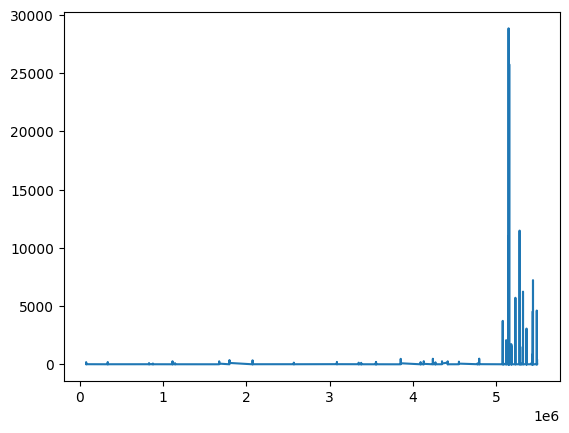

In [10]:
import matplotlib.pyplot as plt
plt.plot(df_phot["SNR"])

In [11]:
df_phot = add_object_band_index(df_phot)

In [12]:
df_phot

,SNID,MJD,FLT,FLUXCAL,FLUXCALERR,SNR,object_index,band_index
75721,6968.0,53000.0,g,-0.007466,0.141841,-0.052636,0,1
75722,6968.0,53000.0,r,-0.230063,0.141841,-1.621979,0,0
75727,6968.0,53002.0,g,0.117051,0.142253,0.822842,0,1
75728,6968.0,53002.0,r,-0.121737,0.141841,-0.858266,0,0
75733,6968.0,53004.0,g,0.147732,0.142360,1.037729,0,1
...,...,...,...,...,...,...,...,...
5492881,10982.0,53174.0,r,0.003661,0.003348,1.093534,49,0
5492882,10982.0,53176.0,r,-0.003007,0.003286,-0.915140,49,0
5492883,10982.0,53178.0,r,0.005956,0.004829,1.233365,49,0
5492884,10982.0,53180.0,r,-0.003586,0.002812,-1.275106,49,0


In [13]:
# get only 20 days of data before and after maximum 

if analysis == 'pcs':
    new_object_df = preprocess_SNANA(df_head=df_head, df_phot=df_phot, norm_bands="individual")
else:
    new_object_df = preprocess_SNANA(df_head=df_head, df_phot=df_phot, norm_bands="individual")
new_object_df = new_object_df[((new_object_df["time"]>-10) & (new_object_df["time"]<20))]
new_object_df = new_object_df[new_object_df["time"]%6==0]

In [14]:
data_dir = get_data_dir_path()
new_object_df.to_csv(os.path.join(data_dir, "perfect_sims.csv"))